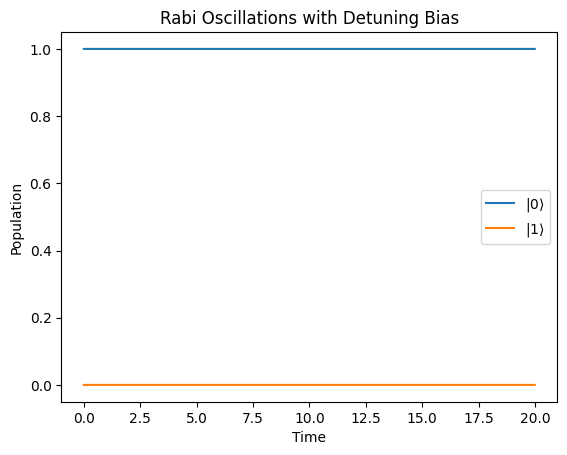

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
omega_0 = 1.0  # Transition frequency
omega = 0.1  # Drive frequency
delta = 0.2  # Detuning
gamma = 0.05  # Dissipation rate

# Time parameters
T = 20  # Total time
dt = 0.01  # Time step
steps = int(T / dt)  # Number of steps

# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=np.complex_)
sigma_z = np.array([[1, 0], [0, -1]], dtype=np.complex_)

# Hamiltonian
H0 = 0.5 * omega_0 * sigma_z + 0.5 * delta * (sigma_z @ sigma_z)
H1 = 0.5 * omega * sigma_x

# Finite difference method
U = np.zeros((2, 2, steps), dtype=np.complex_)
U[:, :, 0] = np.eye(2)
for i in range(1, steps):
    H = H0 - np.sin(omega * i * dt) * H1
    U[:, :, i] = np.eye(2) - 1j * (H * dt)

# Initial state
psi = np.array([1, 0], dtype=np.complex_)

# Evolution
state_evolution = np.zeros((2, steps), dtype=np.complex_)
for i in range(steps):
    state_evolution[:, i] = U[:, :, i] @ psi

# Plot the results
plt.plot(np.arange(0, T, dt), np.abs(state_evolution[0]) ** 2, label=r'$|0\rangle$')
plt.plot(np.arange(0, T, dt), np.abs(state_evolution[1]) ** 2, label=r'$|1\rangle$')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Rabi Oscillations with Detuning Bias')
plt.legend()
plt.show()